# Example code to apply the modular splicing model

## Splicing delta PSI prediction

Example test variants come from ClinVar BRCA1 variants

In [1]:
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_all_table, predict_save
from mmsplice.utils import max_varEff

In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'

In [3]:
dl = SplicingVCFDataloader(gtf, fasta, vcf, encode=False, split_seq=True)

In [4]:
next(dl)

{'inputs': {'seq': {'acceptor_intron': 'CCTAAGAACTCATACAACCAGGACCCTGGAGTCGATTGATTAGAGCCTAGTCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGT',
   'acceptor': 'TCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAA',
   'exon': 'CAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTC

In [5]:
model = MMSplice()

In [6]:
dl = SplicingVCFDataloader(gtf, fasta, vcf)

predictions = predict_all_table(model, dl, pathogenicity=True, splicing_efficiency=True)

4it [00:10,  2.60s/it]


In [7]:
predictionsMax = max_varEff(predictions)

In [8]:
predictionsMax.sort_values(['delta_logit_psi']).head()

,ID,delta_logit_psi,exons,exon_id,gene_id,gene_name,transcript_id,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
921,17:41251568:GTGAGCCACCATGCCTGGCCTCTTTTGCTCCCTT...,-13.142133,17:41251791-41251894:-,ENSE00003477699,ENSG00000012048,BRCA1,ENST00000461221,-2.928739,1.003447,-3.000968,2.998045,0.683019,-3.894215,-5.617308,-1.16161,-4.262190,0.008081,1.0,-7.652228
388,17:41219540:CGATTACAGGCATGCGCCACCGTGCCTCGCCTCA...,-12.980691,17:41219624-41219712:-,ENSE00003492626,ENSG00000012048,BRCA1,ENST00000357654,-2.256955,4.854000,-4.449435,2.749682,0.218514,-2.898835,-6.655025,-1.16161,-3.431215,-0.198021,1.0,-6.342944
596,17:41232465:TGGCCTCCCAAAGTGCTGGGGTTACAGGCGTGAG...,-12.446247,17:41234420-41234592:-,ENSE00003527960,ENSG00000012048,BRCA1,ENST00000357654,-2.337047,0.198098,-3.064758,3.751723,0.509226,-3.498240,-5.302096,-1.16161,-2.475021,-0.310342,1.0,-5.989502
885,17:41248754:ATTTTCATCAGTCACAATTACTGCTGTGTCAATA...,-11.353840,17:41249260-41249306:-,ENSE00003587679,ENSG00000012048,BRCA1,ENST00000357654,-2.896458,0.525801,-3.411850,4.421356,0.797147,-3.806159,-6.966350,-1.16161,-3.872047,0.715352,1.0,-8.457785
632,17:41242891:GTGGGATACATACTACTGAATGCAAAGGACACCA...,-11.322250,17:41242960-41243049:-,ENSE00003547126,ENSG00000012048,BRCA1,ENST00000357654,-3.370246,4.042363,-3.705677,3.972384,0.524251,-2.947957,-5.811156,-1.16161,-4.428016,0.385194,1.0,-9.122529


In [9]:
from mmsplice.utils import writeVCF

In [10]:
writeVCF(vcf, "../tests/data/test-out.vcf", predictionsMax)

In [11]:
import cyvcf2

In [12]:
cyvcf2.__version__

'0.20.9'

If mmsplice `deltalogitPSI` of a variant is bigger than 2 or smaller -2 if is likely to have effect on splicing.

<AxesSubplot:>

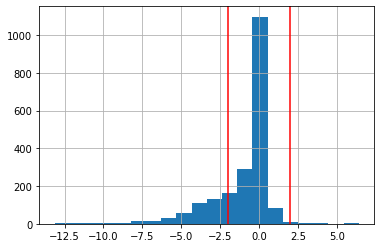

In [13]:
import matplotlib.pyplot as plt

plt.axvline(x=2, color='r')
plt.axvline(x=-2, color='r')

predictions['delta_logit_psi'].hist(bins=20)

For huge vcf files, output is writen to csv file on batch predictions.

In [14]:
dl = SplicingVCFDataloader(gtf, fasta, vcf)
predict_save(model, dl, output_csv='pred.csv', pathogenicity=True, splicing_efficiency=True)

4it [00:12,  3.01s/it]


In [15]:
! head pred.csv

ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
17:41197805:ACATCTGCC>A,17:41196311-41197819:-,ENSE00001814242,ENSG00000012048,BRCA1,ENST00000357654,0.0018479383059293569,-2.9240594,5.0689387,-4.191132,-3.1975443,0.10508263,-2.9240594,5.0689387,-4.1903567,-3.1975443,0.10508263,0.9086872558907043,-0.11951388100548177
17:41197805:ACATCTGCC>A,17:41196312-41197819:-,ENSE00001312675,ENSG00000012048,BRCA1,ENST00000354071,0.0018516280724399984,-2.9240594,5.0689387,-4.190762,-2.977995,0.10508263,-2.9240594,5.0689387,-4.1899843,-2.977995,0.10508263,0.8983493087035741,-0.11950473519277105
17:41197805:ACATCTGCC>A,17:41196821-41197819:-,ENSE00001831829,ENSG00000012048,BRCA1,ENST00000468300,0.006489664576316575,-2.9240594,5.0689387,-3.8693066,-2.1827195,0.10508263,-2.9240594,5.0689387,-3.865532,-2.1827195,0.10508263,0.8472335

## Exon dataloader

Exon dataloader run mmsplice on specific set of variant-exon pairs provided by csv file which contains columns of ('chrom', 'start', 'end', 'strand', 'pos', 'ref', 'alt')

In [16]:
exons = '../tests/data/test_exons.csv'

`ExonDataset` can be used interchangable with `SplicingVCFDataloader` for functions like `predict_save`, `predict_all_table`

In [17]:
from mmsplice.exon_dataloader import ExonDataset

dl = ExonDataset(exons, fasta)
exon_pred = predict_all_table(model, dl, pathogenicity=True, splicing_efficiency=True)

1it [00:00,  2.23it/s]


<AxesSubplot:>

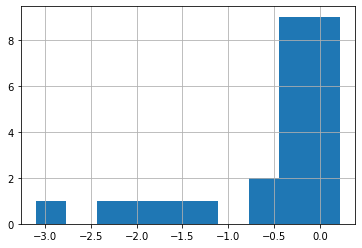

In [18]:
import matplotlib.pyplot as plt

exon_pred['delta_logit_psi'].hist()

In [19]:
dl = ExonDataset(exons, fasta)
predict_save(model, dl, output_csv='pred_exon.csv', pathogenicity=True, splicing_efficiency=True)

1it [00:00,  2.72it/s]


## Tissue-spefic Analysis

In [20]:
dl = SplicingVCFDataloader(gtf, fasta, vcf, tissue_specific=True)
df_tissue = predict_all_table(model, dl)

4it [00:17,  4.37s/it]


In [21]:
df_tissue.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,...,Not Sun Exposed - Skin,Sun Exposed (Lower leg) - Skin,Ileum - Small Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,17:41197805:ACATCTGCC>A,17:41196311-41197819:-,ENSE00001814242,ENSG00000012048,BRCA1,ENST00000357654,0.001848,-2.924059,5.068939,-4.191132,...,0.053964,0.082243,0.101328,0.075041,0.051953,0.773216,0.050436,-0.025338,-0.003824,0.027193
1,17:41197805:ACATCTGCC>A,17:41196312-41197819:-,ENSE00001312675,ENSG00000012048,BRCA1,ENST00000354071,0.001852,-2.924059,5.068939,-4.190762,...,0.055764,0.084173,0.102613,0.075961,0.053700,0.744371,0.051365,-0.023235,-0.002185,0.031144
2,17:41197805:ACATCTGCC>A,17:41196821-41197819:-,ENSE00001831829,ENSG00000012048,BRCA1,ENST00000468300,0.006490,-2.924059,5.068939,-3.869307,...,0.056254,0.086411,0.093613,0.076901,0.046173,0.950643,0.062990,-0.022413,0.001350,0.011484
3,17:41197805:ACATCTGCC>A,17:41197579-41197819:-,ENSE00002914501,ENSG00000012048,BRCA1,ENST00000586385,0.044888,-2.924059,5.068939,-3.507481,...,0.084291,0.113552,0.121693,0.101070,0.081794,0.834321,0.084638,0.022229,0.034102,0.059702
4,17:41197805:ACATCTGCC>A,17:41197645-41197819:-,ENSE00001937547,ENSG00000012048,BRCA1,ENST00000493795,0.048545,-2.924059,5.068939,-3.694287,...,0.132582,0.164388,0.146401,0.129797,0.105319,0.885656,0.113225,0.038444,0.063883,0.085818


Nature scale

In [22]:
dl = SplicingVCFDataloader(gtf, fasta, vcf, tissue_specific=True)
df_tissue = predict_all_table(model, dl, natural_scale=True, ref_psi_version='grch37')

4it [00:21,  5.31s/it]


In [23]:
df_tissue.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,...,Not Sun Exposed - Skin_delta_psi,Sun Exposed (Lower leg) - Skin_delta_psi,Ileum - Small Intestine_delta_psi,Spleen_delta_psi,Stomach_delta_psi,Testis_delta_psi,Thyroid_delta_psi,Uterus_delta_psi,Vagina_delta_psi,Whole Blood_delta_psi
0,17:41197805:ACATCTGCC>A,17:41196311-41197819:-,ENSE00001814242,ENSG00000012048,BRCA1,ENST00000357654,0.001848,-2.924059,5.068939,-4.191132,...,0.000052,0.000079,0.000096,0.000072,0.000051,0.000538,0.000049,-0.000026,-0.000004,0.000027
1,17:41197805:ACATCTGCC>A,17:41196312-41197819:-,ENSE00001312675,ENSG00000012048,BRCA1,ENST00000354071,0.001852,-2.924059,5.068939,-4.190762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17:41197805:ACATCTGCC>A,17:41196821-41197819:-,ENSE00001831829,ENSG00000012048,BRCA1,ENST00000468300,0.006490,-2.924059,5.068939,-3.869307,...,0.000058,0.000090,0.000098,0.000080,0.000047,0.001583,0.000065,-0.000022,0.000001,0.000012
3,17:41197805:ACATCTGCC>A,17:41197579-41197819:-,ENSE00002914501,ENSG00000012048,BRCA1,ENST00000586385,0.044888,-2.924059,5.068939,-3.507481,...,0.000088,0.000120,0.000129,0.000106,0.000085,0.001300,0.000088,0.000022,0.000035,0.000061
4,17:41197805:ACATCTGCC>A,17:41197645-41197819:-,ENSE00001937547,ENSG00000012048,BRCA1,ENST00000493795,0.048545,-2.924059,5.068939,-3.694287,...,0.000142,0.000178,0.000157,0.000138,0.000111,0.001421,0.000120,0.000039,0.000066,0.000090
